## Lo primero que quiero hacer es pasar todos los datos a un único archivo

In [1]:
import os
import glob
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy


OBTENGO LOS DATOS

In [2]:
def obtener_ruta_carpeta_madre(ruta_carpeta):
    ruta_mi_carpeta = os.path.join(ruta_carpeta, 'Datos entrenos nuevos')
    nombre_carpeta = input("Introduce el nombre de la carpeta que quieres analizar:")
    ruta_mi_carpeta = os.path.join(ruta_mi_carpeta, nombre_carpeta)
    return ruta_mi_carpeta

def obtener_lista_archivos(ruta_mi_carpeta):
    lista_archivos = glob.glob(ruta_mi_carpeta + "/*.csv")
    return lista_archivos

def obtener_datos_archivos(lista_archivos, ruta_mi_carpeta):
    lista_datos = []
    for nombre_archivo in lista_archivos:
        if nombre_archivo.endswith('.csv'):
            ruta_archivo = os.path.join(ruta_mi_carpeta, nombre_archivo)
            with open(ruta_archivo, newline='') as archivo_csv:
                lector_csv = csv.reader(archivo_csv)
                for fila in lector_csv:
                    lista_datos.append(fila)
    return lista_datos

ruta_mi_carpeta = obtener_ruta_carpeta_madre(r"C:\Users\Usuario\Desktop\Programación\Proyecto Análisis de Datos Entrenos")
lista_archivos = obtener_lista_archivos(ruta_mi_carpeta)
lista_datos = obtener_datos_archivos(lista_archivos, ruta_mi_carpeta)


In [3]:
#Creo un dataframe con los datos de la lista  puesto el csv no está en un formato que pueda leer pandas
df = pd.DataFrame(lista_datos)

In [4]:
#Quiero eliminar las filas que comienzan por estas palabras, por lo que creo una lista con ellas
palabras_clave = ["Atleta", "Email", "Marcado con *: Solo encoder con Bluetooth"]
#Creo una máscara booleana para saber cuáles son las filas que tienen los valores en la lista
mascara = df.iloc[:, 0].isin(palabras_clave)
#Eliminar las filas que contienen las palabras clave utlizando el método drop()
df = df.drop(df[mascara].index)

In [5]:
#Reseteamos los índices puesto hemos eliminado algunas filas, indicando en el drop que queremos eliminar la columna index
#del dataframe original
df.reset_index(drop = True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,Ejercicio,Fecha,nº Serie,Peso (kg),Comentarios,nº Rep.,Tipo*,VMP (m/s),Velocidad máxima (m/s),Potencia Media (W),ROM (cm),1RM (kg)
1,SENTADILLA BARRA ALTA,14-12-2022 16:40,None,None,None,None,None,None,None,None,None,None
2,,,1,"20,00",-,None,None,None,None,None,None,None
3,,,,,,1,C,"1,52","2,21","298,22","72,36",-
4,,,,,,2,C,"1,40","2,20","274,68","88,29",-
...,...,...,...,...,...,...,...,...,...,...,...,...
238,,,,,,1,C,"0,57","1,41","671,00","71,71","139,91"
239,,,3,"125,00",-,None,None,None,None,None,None,None
240,,,,,,1,C,"0,52","1,34","637,65","67,76","140,61"
241,,,4,"130,00",-,None,None,None,None,None,None,None


In [6]:
#Indico que quiero que la primera fila sea el header del dataframe
df = df.set_axis(df.iloc[0], axis=1).drop(df.index[0])

In [7]:
#Volvemos a resetear los índices del dataframe
df = df.reset_index(drop=True)

In [8]:
#Eliminamos la columna comentarios del dataframe, ya que no me interesa
df = df.drop("Comentarios", axis=1)

In [9]:
#Quiero eliminar las filas que tengan la palabra ejercicio
palabra_clave = ["Ejercicio"]
#Creo una máscara booleana para saber cuáles son las filas que tienen los valores en la lista
mascara = df.iloc[:, 0].isin(palabra_clave)
#Eliminar las filas que contienen las palabras clave utlizando el método drop()
df = df.drop(df[mascara].index)

In [10]:
#Volvemos a resetear los índices del dataframe
df = df.reset_index(drop=True)

In [11]:
#Creo una función para rellenar los huecos faltantes para obtener un dataframe homogéneo
def rellenar_datos_faltantes(columna):
  valor_del_momento = df.loc[0, columna]
  for indice, valor in df[columna].iteritems():
    if valor == "":
      df.loc[indice, columna] = valor_del_momento 
    else:
      valor_del_momento = valor

In [12]:
#Por cada columna que haya aplicamos la función 
for columna in df.columns:
  rellenar_datos_faltantes(columna)

In [13]:
df = df.dropna(subset=['VMP (m/s)'])


In [14]:
for row in df["1RM (kg)"]:
    if row == "-":
        df["1RM (kg)"].replace("-", np.nan, inplace=True)

In [15]:
for columna in df.columns:
    if columna == "Ejercicio" or columna == "Fecha" or columna == "Tipo*":
        continue
    else:
        for row in df[columna]:
            row = pd.to_numeric(df[columna], errors='coerce')

In [16]:
df['1RM (kg)'] = pd.to_numeric(df['1RM (kg)'].str.replace(',', '.'), errors='coerce')

In [17]:
df.reset_index(drop=True)

3,Ejercicio,Fecha,nº Serie,Peso (kg),nº Rep.,Tipo*,VMP (m/s),Velocidad máxima (m/s),Potencia Media (W),ROM (cm),1RM (kg)
0,SENTADILLA BARRA ALTA,14-12-2022 16:40,1,"20,00",1,C,"1,52","2,21","298,22","72,36",NaN
1,SENTADILLA BARRA ALTA,14-12-2022 16:40,1,"20,00",2,C,"1,40","2,20","274,68","88,29",NaN
2,SENTADILLA BARRA ALTA,14-12-2022 16:40,1,"20,00",3,C,"1,57","2,32","308,03","84,74",NaN
3,SENTADILLA BARRA ALTA,14-12-2022 16:40,2,"20,00",1,C,"1,41","2,13","276,64","81,15",NaN
4,SENTADILLA BARRA ALTA,14-12-2022 16:40,2,"20,00",2,C,"1,35","2,16","264,87","75,20",NaN
...,...,...,...,...,...,...,...,...,...,...,...
134,SENTADILLA BARRA ALTA,22-01-2023 12:35,7,"105,00",1,C,"0,71","1,54","731,34","77,05",136.36
135,SENTADILLA BARRA ALTA,24-01-2023 09:59,1,"100,00",1,C,"0,65","1,56","637,65","76,05",123.82
136,SENTADILLA BARRA ALTA,24-01-2023 09:59,2,"120,00",1,C,"0,57","1,41","671,00","71,71",139.91
137,SENTADILLA BARRA ALTA,24-01-2023 09:59,3,"125,00",1,C,"0,52","1,34","637,65","67,76",140.61


In [18]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%m-%Y %H:%M')
df['Fecha'] = df['Fecha'].dt.date
df.head(5)

3,Ejercicio,Fecha,nº Serie,Peso (kg),nº Rep.,Tipo*,VMP (m/s),Velocidad máxima (m/s),Potencia Media (W),ROM (cm),1RM (kg)
2,SENTADILLA BARRA ALTA,2022-12-14,1,"20,00",1,C,"1,52","2,21","298,22","72,36",NaN
3,SENTADILLA BARRA ALTA,2022-12-14,1,"20,00",2,C,"1,40","2,20","274,68","88,29",NaN
4,SENTADILLA BARRA ALTA,2022-12-14,1,"20,00",3,C,"1,57","2,32","308,03","84,74",NaN
6,SENTADILLA BARRA ALTA,2022-12-14,2,"20,00",1,C,"1,41","2,13","276,64","81,15",NaN
7,SENTADILLA BARRA ALTA,2022-12-14,2,"20,00",2,C,"1,35","2,16","264,87","75,20",NaN


(array([19341., 19348., 19358., 19365., 19372., 19379.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

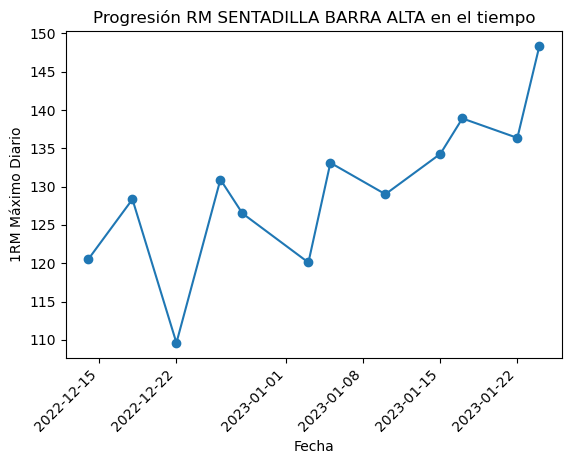

In [19]:
maximos_por_grupo = df[pd.notnull(df["1RM (kg)"])].groupby("Fecha")["1RM (kg)"].max()
maximos_por_grupo.index = pd.to_datetime(maximos_por_grupo.index)
maximos_por_grupo = maximos_por_grupo.sort_index()
maximos_por_grupo.plot(kind = "line", marker = "o", label="1RM Máximo Diario")
plt.xlabel("Fecha")
plt.ylabel("1RM Máximo Diario")
ejercicio = df.loc[2, "Ejercicio"]
plt.title(f"Progresión RM {ejercicio} en el tiempo")
plt.xticks(rotation=45, ha='right')

Estoy intentando obtener la fatiga generada en cada entreno, y para ello lo que me falta es coger sólo los pesos máximos de la sesión en el dataframe que tengo en estos momentos, tengo que usar las ias para ver cómo obtengo sólo esa parte, a ver si con chatgpt lo consigo

AHORA VOY POR AQUÍ, HAY QUE IR FORMATEANDO Y DEPURANDO EL CÓPDIGO POCO A POCO

In [20]:
df_agrupado = df.groupby(["Fecha", "Peso (kg)"]).agg({"VMP (m/s)": ["max", "min"]})
df_agrupado.reset_index(inplace=True)
df_agrupado.columns = ["Fecha", "Peso (kg)", "VMP (m/s) Max", "VMP (m/s) Min"]
df_agrupado["Fecha"] = pd.to_datetime(df_agrupado["Fecha"], format='%Y-%m-%d')
df_agrupado["Fecha"] = df_agrupado["Fecha"].dt.date
df_agrupado["Peso (kg)"] = df_agrupado["Peso (kg)"].replace(",", ".", regex=True)
df_agrupado["Peso (kg)"] = pd.to_numeric(df_agrupado["Peso (kg)"])
df_agrupado["VMP (m/s) Max"] = df_agrupado["VMP (m/s) Max"].replace(",", ".", regex=True)
df_agrupado["VMP (m/s) Max"] = pd.to_numeric(df_agrupado["VMP (m/s) Max"])
df_agrupado["VMP (m/s) Min"] = df_agrupado["VMP (m/s) Min"].replace(",", ".", regex=True)
df_agrupado["VMP (m/s) Min"] = pd.to_numeric(df_agrupado["VMP (m/s) Min"])
idx = df_agrupado.groupby("Fecha")["Peso (kg)"].transform(max) == df_agrupado["Peso (kg)"]
df_max_peso = df_agrupado[idx]
df_max_peso.reset_index(drop=True, inplace=True)
df_max_peso["Fatiga"] = (df_max_peso["VMP (m/s) Max"] - df_max_peso["VMP (m/s) Min"]) / df_max_peso["VMP (m/s) Max"]
df_max_peso["Fatiga"] = df_max_peso["Fatiga"] * 100
df_max_peso["Fatiga"] = df_max_peso["Fatiga"].astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20040\1734202638.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_peso["Fatiga"] = (df_max_peso["VMP (m/s) Max"] - df_max_peso["VMP (m/s) Min"]) / df_max_peso["VMP (m/s) Max"]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20040\1734202638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_peso["Fatiga"] = df_max_peso["Fatiga"] * 100
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20040\1734202638.py:17: SettingWithCopyWarning: 
A value is tryin

In [21]:
gaps_tiempos_recuperacion = {
    (0, 4): "3-4 horas",
    (4, 8): "5-8 horas",
    (8, 11): "8-16 horas",
    (11, 14): "16-24 horas",
    (15, 18): "24-36 horas",
    (19, 22): "36-48 horas",
    (22,100): "+48 horas",
}
def assign_recovery_time(x):
    for k, v in gaps_tiempos_recuperacion.items():
        if x == min(k) or x == max(k) or (min(k) < x < max(k)):
            return v
    return "Desconocido"

df_max_peso["Tiempo de recuperación"] = df_max_peso["Fatiga"].apply(assign_recovery_time)
df_max_peso


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20040\3053222950.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_peso["Tiempo de recuperación"] = df_max_peso["Fatiga"].apply(assign_recovery_time)


,Fecha,Peso (kg),VMP (m/s) Max,VMP (m/s) Min,Fatiga,Tiempo de recuperación
0,2022-12-14,80.0,0.88,0.65,26,+48 horas
1,2022-12-18,90.0,0.82,0.64,21,36-48 horas
2,2022-12-22,70.0,0.92,0.72,21,36-48 horas
3,2022-12-26,100.0,0.72,0.59,18,24-36 horas
4,2022-12-28,90.0,0.73,0.73,0,3-4 horas
5,2023-01-03,100.0,0.61,0.51,16,24-36 horas
6,2023-01-05,95.0,0.80,0.70,12,16-24 horas
7,2023-01-10,105.0,0.64,0.52,18,24-36 horas
8,2023-01-15,100.0,0.61,0.61,0,3-4 horas
9,2023-01-17,120.0,0.56,0.49,12,16-24 horas


In [22]:
colores = [plt.cm.Paired(i) for i in range(6)]
colors = []
for porcentaje in df_max_peso["Fatiga"]:
    if porcentaje <= 3:
        colors.append(colores[0])
    elif porcentaje <= 7:
        colors.append(colores[1])
    elif porcentaje <= 13:
        colors.append(colores[2])
    elif porcentaje <= 17:
        colors.append(colores[3])
    elif porcentaje <= 22:
        colors.append(colores[4])
    else:
        colors.append(colores[5])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20040\2549035501.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_max_peso.index, rotation=45, ha='right')


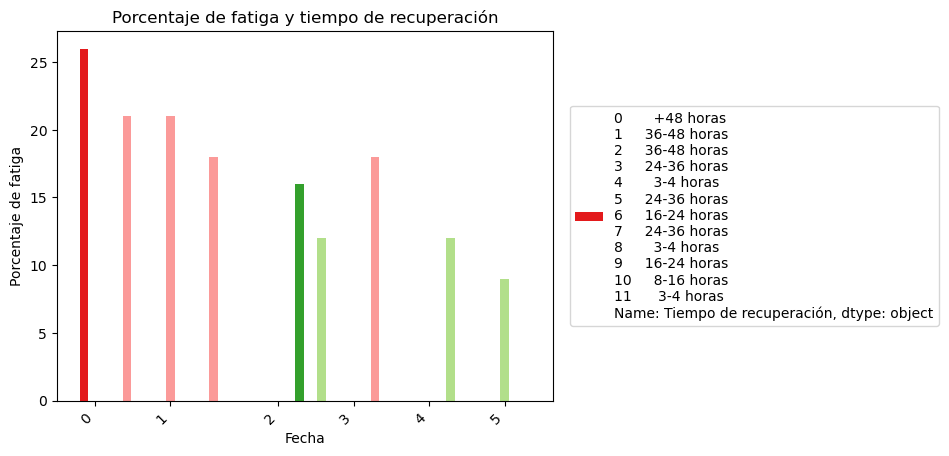

In [23]:
fig, ax = plt.subplots(1,2)
ax.bar(df_max_peso["Fecha"], df_max_peso["Fatiga"], color = colors, label=df_max_peso["Tiempo de recuperación"])
for i, row in df_max_peso.iterrows():
    ax.annotate(str(row["Fatiga"]), xy=(i, row['Fatiga']), ha='center', va='bottom')
ax.set_xlabel("Fecha")
ax.set_ylabel("Porcentaje de fatiga")
ax.set_title("Porcentaje de fatiga y tiempo de recuperación")
ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5))
ax.set_xticklabels(df_max_peso.index, rotation=45, ha='right')
plt.show()

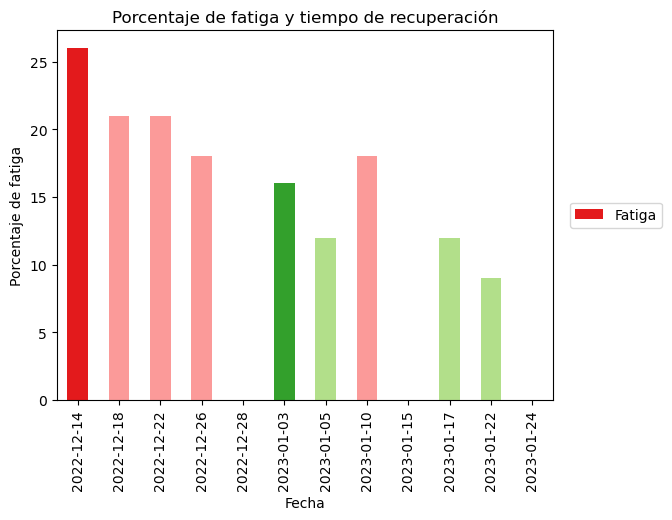

In [33]:
df_max_peso.plot(kind = "bar", x="Fecha", y="Fatiga", label="Fatiga", color=colors)
plt.xlabel("Fecha")
plt.ylabel("Porcentaje de fatiga")
plt.title("Porcentaje de fatiga y tiempo de recuperación")
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.show()

#Quiero introducir una función que calcule la intensidad máxima de la sesión en función del porcentaje máximo de RM
Para ello tengo que tener una columna que calcule el porcentaje de rm, **pero que sólo puede ser de la primera repetición de cada serie**

Lo que voy a hacer a continuación es obtener la ecuación de la recta que forman los puntos de las distintas cargas de la sentadilla

In [25]:
#Creo diccionario con los puntos de los que quiero obtener la ecuación
diccionario_MPV_for_each_percentaje = [1.28, 1.21 , 1.14, 1.07, 1.00, 0.92, 0.84, 0.76, 0.68, 0.59, 0.51, 0.42, 0.32]
#Convierto el diccionario en una serie de pandas
porcentaje_serie = pd.Series(diccionario_MPV_for_each_percentaje)
#Creo una función que me devuelva una ecuación polinómica si le paso los datos para formarla
def funcion_polinomica(x, a, b, c):
    return (a)*(x**2)+(b*x)+c
#Ajustamos la función polinómica a los datos
popt, _ = scipy.optimize.curve_fit(funcion_polinomica, np.arange(len(porcentaje_serie)), porcentaje_serie)
a, b, c = popt
x = 0.51
funcion_sentadilla = funcion_polinomica(x, a, b, c)
funcion_sentadilla

1.2443382983539903

LA FUNCION NO ME ARROJA UN BUEN RESULTADO, TENGO QUE DARLE UNA VUELTA ESTOS DÍAS